# Mean Squared Logarithmic Error

## Formula del MSLE

MSLE se usa cuando y tiene una larga cola de distribución , o cuando nos interesa el ratio de los valores verdaderos y los valores que se han predecido.
1 (la constante ) es añadido para evitar divergencia cuando y es igual a 0.

## Mecanismo:

    Es solo un error cuadrático medio (MSE) calculado en escala logarítmica. De hecho, para calcularlo, tomamos un logaritmo de nuestras predicciones y los valores objetivo, y calculamos el error cuadrático medio (MSE) entre ellos.

    Los objetivos generalmente no son negativos pero pueden ser iguales a 0, y el logaritmo de 0 no está definido. Por tanto se agrega una constante a las predicciones y los objetivos antes de aplicar la operación logarítmica.Esta constante también se puede definir para que sea diferente a uno según el problema que queramos resolver.

    Esta métrica se usa generalmente en la misma situación que MSPE (Error de porcentaje cuadrático medio) y MAPE(Error porcentual absoluto medio), ya que también conlleva errores relativos más que errores absolutos.


## Funcionalidad:

    La expresión
    log(pi+1)−log(ai+1)

    tambien puede ser escrita así:
$log((pi+1)/(ai+1))$

![aqui va la sintaxis](https://cdn-images-1.medium.com/max/800/1*VjNfaSRuj3FIMcKA0yJAGg.png)

    MSLE mide el ratio de los valores reales y predichos.

### MSLE es preferible cuando:

* Los objetivos crecen exponencialmente (por ejemplo haciendo un conteo de población)
* Nos interesa mas el porcentaje de errores que el valor absoluto de errores.
* Hay un gran rango de valores en las variables objetivo y no queremos penalizar grandes diferencias cuando los valores predichos y reales son numeros grandes.
* MSLE penaliza una infraestimación frente a una sobreestimación.
        
### Vamos a imaginar 2 casos de predicciones,

__Caso-1:__  
nuestro modelo tiene una prediccion de 30 cuando el numero actual es 40

__Caso-2:__  
nuestro modelo tiene una prediccion de 300 cuando el numero actual es 400  
Con el error cuadrático medio el segundo resultado es puntuado como 10 veces mas que el primer resultado
En cambio con el error logaritmico cuadrático medio los 2 resultados son puntuados igual.
MSLE tiene en cuenta el ratio de cambio.

Si observamos el siguiente ejemplo:

__Caso-3 :__

        Prediccion = 600, Actual = 1000 (la diferencia es de 400)

    RMSE = 400, RMSLogE = 0.5108

    Caso-4 :

        Prediccion = 1400 , Actual = 1000 (la diferencia es de 400)

    RMSE = 400, RMSLogE = 0.3365

    Cuando las diferencias son las mismas entre los valores predichos y reales:
        El error cuadrático medio las trata de la misma forma en ambos casos ,
        sin embargo el error logaritmico cuadrático medio penaliza la baja estimación mas que la sobreestimación.

    A menudo, penalizar una baja estimacion mas que una sobreestimacion es importante a la hora de predicciones sobre ventas y demandas de inventario.
    Sería preferible tener inventario extra a no ser capaz de proveer un producto tanto como se demanda.






- - - - - - - - - - - - -


URLs:

https://towardsdatascience.com/11-evaluation-metrics-data-scientists-should-be-familiar-with-lessons-from-a-high-rank-kagglers-8596f75e58a7#5185

https://hrngok.github.io/posts/metrics/

https://sitiobigdata.com/2019/05/27/modelos-de-machine-learning-metricas-de-regresion-mse-parte-2/

---
Imports

In [181]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

Preparación de datos

In [182]:
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=413)

# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

MSLE

In [183]:
# define model
model_msle = Sequential()
model_msle.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model_msle.add(Dense(1, activation='linear'))
model_msle.compile(loss='mean_squared_logarithmic_error', metrics=['msle'])

# fit model
history_msle = model_msle.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

MSE

In [184]:
# define model
model_mse = Sequential()
model_mse.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model_mse.add(Dense(1, activation='linear'))
model_mse.compile(loss='mean_squared_error', metrics=['mse'])

# fit model
history_mse = model_mse.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

MAE

In [185]:
# define model
model_mae = Sequential()
model_mae.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model_mae.add(Dense(1, activation='linear'))
model_mae.compile(loss='mean_absolute_error', metrics=['mae'])

# fit model
history_mae = model_mae.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

Visualización

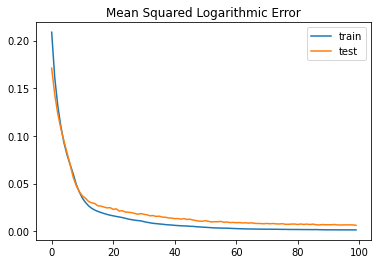

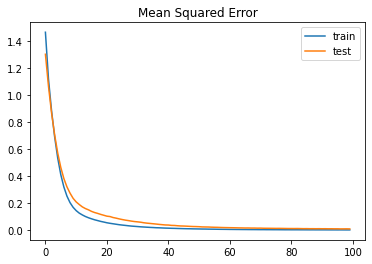

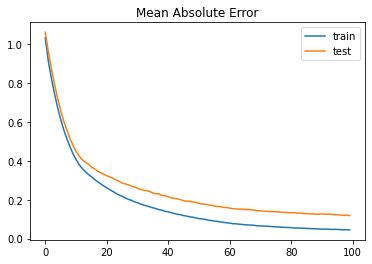

In [186]:
# plot loss during training
pyplot.title("Mean Squared Logarithmic Error")
pyplot.plot(history_msle.history['loss'], label='train')
pyplot.plot(history_msle.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# plot loss during training
pyplot.title("Mean Squared Error")
pyplot.plot(history_mse.history['loss'], label='train')
pyplot.plot(history_mse.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# plot loss during training
pyplot.title("Mean Absolute Error")
pyplot.plot(history_mae.history['loss'], label='train')
pyplot.plot(history_mae.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [187]:
# mlp for regression with msle loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]



